DEVOIR MAISON 3

---
# Formule de quadrature de Fejér
---

In [ ]:
import numpy as np
from scipy.special import roots_legendre
from scipy.integrate import quad
import matplotlib.pyplot as plt

Le but de ce DM est de programmer la méthode de quadrature de Fejér pour calculer l'intégrale 
\begin{equation*}
I(f) = \int\limits_{-1}^{1} f( x ) dx,
\end{equation*}
où $ f $ est une fonction continue sur $ [ -1, 1 ] $, et de la comparer avec la méthode de Gauss et la formule composée de Simpson.

Nous allons tester les différentes méthodes de quadrature sur les fonctions suivantes:
\begin{align*}
& f_0( x ) = e^x, \quad f_1( x ) = \frac{ 1 }{ 1 + 16 x^2 }, \\
& f_2( x ) = | x^2 - 0.25 |^3, \quad f_3( x ) = | x + 0.5 |^{1/2}. 
\end{align*}

On remarque que $ f_0 $ est une fonction entière, $ f_1 $ est analytique au voisinage de $ [ -1, 1 ] $, $ f_2 \in C^3 $ et $ f_3 \in C $.

**Question 1.**
> Définir les fonctions $ f_i $, $ i = 0,  1, 2, 3 $.  

In [ ]:
def f0(x): 
    return np.exp(x)

def f1(x):
    return 1 / (1 + 16*np.power(x, 2))

def f2(x):
    return np.power(np.abs(x**2 - 1/4), 3)

def f3(x):
    return np.power(np.abs(x+1/2), 1/2)

## Formule de quadrature de Gauss à $ N $ points

On rappelle que la formule de quadrature de Gauss à $ N $ points est la formule qui s'écrit sous la forme 
\begin{equation*}
J_G( f ) = \sum\limits_{ k = 1 }^N \lambda_k f( x_k ),
\tag{1}
\end{equation*}
où les points $ x_k $, $ k = 1, \ldots, N $, sont les racines du polynome de Legendre $ P_N $ défini par recurrence via la formule:
\begin{align*}
& P_0( x ) = 1, \\
& P_1( x ) = x, \\
& P_{ N }( x ) = \frac{ ( 2 N - 1 ) x P_{ N - 1 }( x ) - ( N - 1 ) P_{ N - 2 }( x ) }{ N }
\end{align*}
et $ \lambda_k $ sont donnés par la formule
\begin{equation*}
\lambda_k = \frac{ 1 - x_k^2 }{ N P^2_{ N-1 }( x_k ) }.
\end{equation*}


**Question 2.** 
> 1. Programmez une fonction `gauss` qui prend en argument une fonction `f` et un entier `N` et qui retourne une valeur approchée de $ I(f) $ obtenue par la formule de quadrature de Gauss (1). On pourra utiliser la fonction `roots_legendre` du module `scipy.special`.
> 2. Tester votre fonction en comparant la valeur de $ \int\limits_{-1}^1 f_i(x)dx $ calculée à l'aide de la fonction `quad` de `scipy.integrate` et à l'aide de votre fonction `gauss` pour les fonction $ f_i $, $ i = 0, 1, 2, 3 $.

In [ ]:
def gauss(f, N):
    roots, weights = roots_legendre(N)
    return np.sum(weights * f(roots))

In [ ]:
for f in [f0, f1, f2, f3]:
    print(f'Calcule de I(f) par la méthode de gauss et par la formule quadratique pour la fonction {f.__name__}')
    for n in range(1, 11):
        print(f"Pour n = {n}, gauss = {gauss(f, n)} et quad = {quad(f, -1, 1)[0]}")
    print('')

Calcule de I(f) par la méthode de gauss et par la formule quadratique pour la fonction f0
Pour n = 1, gauss = 2.0 et quad = 2.3504023872876028
Pour n = 2, gauss = 2.3426960879097307 et quad = 2.3504023872876028
Pour n = 3, gauss = 2.3503369286800115 et quad = 2.3504023872876028
Pour n = 4, gauss = 2.3504020921563766 et quad = 2.3504023872876028
Pour n = 5, gauss = 2.350402386462826 et quad = 2.3504023872876028
Pour n = 6, gauss = 2.3504023872860342 et quad = 2.3504023872876028
Pour n = 7, gauss = 2.3504023872876014 et quad = 2.3504023872876028
Pour n = 8, gauss = 2.3504023872876028 et quad = 2.3504023872876028
Pour n = 9, gauss = 2.3504023872876023 et quad = 2.3504023872876028
Pour n = 10, gauss = 2.350402387287602 et quad = 2.3504023872876028

Calcule de I(f) par la méthode de gauss et par la formule quadratique pour la fonction f1
Pour n = 1, gauss = 2.0 et quad = 0.6629088318340162
Pour n = 2, gauss = 0.31578947368421056 et quad = 0.6629088318340162
Pour n = 3, gauss = 0.99371069182

## Formule composée de Simpson à $ N $ points  

On remarque que la formule de quadrature de Gauss à $ N $ points (1) utilise exactement $ N $ *points de quadrature*, i.e. $ N $ points où $ f $ est évaluée. 

La formule composée de Simpson utilise toujours un nombre *impair* de points de quadrature. Plus particulièrment, la formule composée de Simpson à $ N $ points de quadrature, pour $ N $ impair, s'écrit
\begin{equation*}
J_S( f ) = \frac{ h }{ 3 } \sum\limits_{ k = 1 }^{ m }[ f( x_{ 2k - 2 } ) + 4 f( x_{2k - 1} ) + f( x_{ 2k } ) ]
\tag{2}
\end{equation*}
où $ m = N // 2 $, $ h = \frac{ b - a }{ 2m } $, $ x_k = a + k h $.

**Question 3.** 
> 1. Programmez une fonction `simpson` qui prend en argument une fonction `f` et un entier impair `N` et qui retourne une valeur approchée de $ I(f) $ obtenue par la formule composée de Simpson à $ N $ points de quadrature (2). *On privilégiera une implémentation qui n'utilise pas de boucle for.* 
> 2. Tester votre fonction en comparant la valeur de $ \int\limits_{-1}^1 f_i(x)dx $ calculée à l'aide de la fonction `quad` de `scipy.integrate` et à l'aide de votre fonction `simpson` pour les fonction $ f_i $, $ i = 0, 1, 2, 3 $.

In [28]:
def simpson(f, N):
    if N % 2 == 0:
        raise ValueError("N doit est impair.")
    
    h = 2 / (2 * (N - 1) // 2)
    fx = f(np.linspace(-1, 1, N))
    
    return (h / 3) * (fx[0] + 4 * fx[1:-1:2].sum() + 2 * fx[2:-1:2].sum() + fx[-1])

In [29]:
for f in [f0, f1, f2, f3]:
    print(f'Calcule de I(f) par la méthode de simpson et par la formule quadratique pour la fonction {f.__name__}')
    for n in range(3, 16, 2):
        print(f"Pour n = {n}, simpson = {simpson(f, n)} et quad = {quad(f, -1, 1)[0]}")
    print('')

Calcule de I(f) par la méthode de simpson et par la formule quadratique pour la fonction f0
Pour n = 3, simpson = 2.362053756543496 et quad = 2.3504023872876028
Pour n = 5, simpson = 2.3511948318802554 et quad = 2.3504023872876028
Pour n = 7, simpson = 2.350561486811035 et quad = 2.3504023872876028
Pour n = 9, simpson = 2.3504530172422795 et quad = 2.3504023872876028
Pour n = 11, simpson = 2.3504231806814837 et quad = 2.3504023872876028
Pour n = 13, simpson = 2.350412429522249 et quad = 2.3504023872876028
Pour n = 15, simpson = 2.3504078125830676 et quad = 2.3504023872876028

Calcule de I(f) par la méthode de simpson et par la formule quadratique pour la fonction f1
Pour n = 3, simpson = 1.372549019607843 et quad = 0.6629088318340162
Pour n = 5, simpson = 0.6196078431372549 et quad = 0.6629088318340162
Pour n = 7, simpson = 0.7271053809651714 et quad = 0.6629088318340162
Pour n = 9, simpson = 0.6431372549019607 et quad = 0.6629088318340162
Pour n = 11, simpson = 0.6738214805917826 et q

## Formule de quadrature de Fejér à $N$ points
La formule de quadrature de Fejér fait intervenir les points et les polynomes de Tchebychev. On rappelle que les polynomes de Tchebychev $ T_N $ sont des polynomes définis sur $ [ -1, 1 ] $ via la formule 
$$
T_N( \cos \theta ) = \cos( N \theta ).
$$
On peut également les définir via la formule recurrente suivante:
\begin{align*}
& T_0( x ) = 1, \\
& T_1( x ) = x, \\
& T_N( x ) = 2 x T_{ N-1 }( x ) - T_{ N-2 }( x ).
\end{align*}

Les points de Tchebychev $ x_{ k, N } $, $ k = 1, \ldots, N $, sur $ [ -1, 1 ] $ sont définis par la formule
\begin{equation*}
x_{ k, N } = \cos\left( \frac{ 2k - 1 }{ 2 N } \pi \right), \quad k = 1, 2, \ldots, N.
\end{equation*}

**Question 4.** 
> Rappeler pourquoi les points de Tchebychev $ x_{k, N} $, $ k = 1, \ldots, N $, sont racines du polynome de Tchebychev $ T_N $.

**Question 5.**
> 1. Définir une fonction `poly_tchebychev` qui prend en argument un `ndarray` `x` et un entier positif `N` et qui retourne l'évaluation de $ T_N $ en $ x $. 
> 2. Définir une fonction `points_tchebychev` qui prend en argument un entier positif $ N $ et qui retourne un `ndarray` des points de Tchebychev $ x_{ k, N } $, $ k = 1, \ldots, N $. *On privilégiera une implémentation qui n'utilise pas de boucle for.*
> 3. Tester vos fonctions en évaluant un polynome de Tchebychev $ T_N $ en les points de Tchebychev $ x_{ k, N } $, $ k = 1, \ldots, N $.

##### Montrons que les points de Tchebychev T_N( x_{k, N}  ) sont racines du polynomes de Tchebychev $T_N$

On sait que $\cos(A-B) = \cos(A)\cos(B) - \sin(A)\sin(B)$

Pour commencer, on a $$
T_N( \cos \theta ) = \cos( N \theta ).
$$
Donc $T_N( x_{k, N}  ) = T_N( \cos\left( \frac{ 2k - 1 }{ 2 N } \pi \right) ) = \cos\left( \frac{ N(2k - 1) }{ 2 N } \pi \right) = \cos\left( \frac{ 2k - 1 }{ 2 } \pi \right) = \cos\left( k\pi - \frac{\pi}{2} \right) = \cos(k\pi)cos(\frac{\pi}{2}) - \sin(k\pi)\sin(\frac{\pi}{2})$ pour $k=1,{\dots},N$

Or $cos(\frac{\pi}{2}) = 0$ et $\sin(k\pi)$ pour $k=1,{\dots},N$

Donc $T_N( x_{k, N}  ) = 0$ donc  $x_{k, N}$ sont racines du polynomes de Tchebychev $T_N$

In [30]:
def poly_tchebychev(x, N):
    if N == 0:
        return np.ones_like(x)
    elif N == 1:
        return x
    else:
        return 2 * x * poly_tchebychev(x, N-1) - poly_tchebychev(x, N-2)

In [31]:
def points_tchebychev(N):
    k = np.arange(1, N+1)
    return np.cos((2 * k - 1) * np.pi / (2 * N))

In [32]:
for n in range(2, 10):
    xk = points_tchebychev(n)
    Tn = poly_tchebychev(xk, n)
    print(f"Pour N = {n}")
    print(f"Les points de Tchebychev sont {xk}")
    print(f"L'evaluation du polynome de Tchebychev Tn en ces points est {Tn}")
    print("")

Pour N = 2
Les points de Tchebychev sont [ 0.70710678 -0.70710678]
L'evaluation du polynome de Tchebychev Tn en ces points est [ 2.22044605e-16 -2.22044605e-16]

Pour N = 3
Les points de Tchebychev sont [ 8.66025404e-01  6.12323400e-17 -8.66025404e-01]
L'evaluation du polynome de Tchebychev Tn en ces points est [ 3.33066907e-16 -1.83697020e-16 -3.33066907e-16]

Pour N = 4
Les points de Tchebychev sont [ 0.92387953  0.38268343 -0.38268343 -0.92387953]
L'evaluation du polynome de Tchebychev Tn en ces points est [-2.22044605e-16 -2.22044605e-16  1.11022302e-16 -2.22044605e-16]

Pour N = 5
Les points de Tchebychev sont [ 9.51056516e-01  5.87785252e-01  6.12323400e-17 -5.87785252e-01
 -9.51056516e-01]
L'evaluation du polynome de Tchebychev Tn en ces points est [-4.44089210e-16  0.00000000e+00  3.06161700e-16 -7.77156117e-16
  4.44089210e-16]

Pour N = 6
Les points de Tchebychev sont [ 0.96592583  0.70710678  0.25881905 -0.25881905 -0.70710678 -0.96592583]
L'evaluation du polynome de Tchebyc

La formule de quadrature de Fejér à $ N $ points s'écrit sous la forme 
\begin{equation*}
J_F( f ) = \sum\limits_{ k = 1 }^N \lambda_k f( x_k ),
\tag{1}
\end{equation*}
où $ x_k = x_{ k, N } $, $ k = 1, \ldots, N $, sont les points de Tchebychev
et $ \lambda_k $ sont donnés par la formule
\begin{equation*}
\lambda_k = \frac{ 2 }{ N }\left( 1 - \sum_{ m = 1 }^{ \lfloor N/2 \rfloor }  \frac{ 2T_{ 2m }( x_k ) }{ 4 m^2 - 1 }  \right).
\end{equation*}

**Question 6.** 
> 1. Programmez une fonction `fejer_points_weights` qui prend en argument un entier `N` et qui retourne un ndarray `x` des points de Tchebychev $ x_{k, N} $ et un ndarray `lam` des poids $ \lambda_k $ de la formule de Fejér.
> 2. Programmez une fonction `fejer` qui prend en argument une fonction `f` et un entier `N`et qui retourne une valeur approchée de $ I $ obtenue par la formule de quadrature de Fejér. 
> 3. Tester votre fonction en comparant la valeur de $ \int\limits_{-1}^1 f_i(x)dx $ calculée à l'aide de la fonction `quad` de `scipy.integrate` et à l'aide de votre fonction `fejer` pour les fonction $ f_i $, $ i = 0, 1, 2, 3 $.

In [33]:
def fejer_points_weights(N):
    xk = points_tchebychev(N)
    lamk = np.zeros(N)
    for k in range(N):
        s = 0
        for m in range(1, N//2+1):
            T = poly_tchebychev(xk[k], 2 * m)
            s += 2 * T / (4 * np.power(m, 2) - 1)
        lamk[k] = 2 / N * (1 - s)
    return xk, lamk

In [34]:
def fejer(f, N):
    xk, lamk = fejer_points_weights(N)
    return np.sum(lamk * f(xk))

In [35]:
for f in [f0, f1, f2, f3]:
    print(f'Calcule de I(f) par la méthode de fejer et par la formule quadratique pour la fonction {f.__name__}')
    for n in range(1, 11):
        print(f"Pour n = {n}, fejer = {fejer(f, n)} et quad = {quad(f, -1, 1)[0]}")
    print('')

Calcule de I(f) par la méthode de fejer et par la formule quadratique pour la fonction f0
Pour n = 1, fejer = 2.0 et quad = 2.3504023872876028
Pour n = 2, fejer = 2.521183673042712 et quad = 2.3504023872876028
Pour n = 3, fejer = 2.35469453390679 et quad = 2.3504023872876028
Pour n = 4, fejer = 2.351164449305366 et quad = 2.3504023872876028
Pour n = 5, fejer = 2.3504110924399146 et quad = 2.3504023872876028
Pour n = 6, fejer = 2.3504049906823328 et quad = 2.3504023872876028
Pour n = 7, fejer = 2.350402405080618 et quad = 2.3504023872876028
Pour n = 8, fejer = 2.350402393654548 et quad = 2.3504023872876028
Pour n = 9, fejer = 2.3504023873162794 et quad = 2.3504023872876028
Pour n = 10, fejer = 2.350402387298774 et quad = 2.3504023872876028

Calcule de I(f) par la méthode de fejer et par la formule quadratique pour la fonction f1
Pour n = 1, fejer = 2.0 et quad = 0.6629088318340162
Pour n = 2, fejer = 0.22222222222222224 et quad = 0.6629088318340162
Pour n = 3, fejer = 1.179487179487179 

## Comparaison des méthodes

**Question 7.**
> 1. Pour chacune des fonction $ f_i $, $ i = 0, 1, 2, 3 $, tracez sur un graphique le logarithme d'erreur entre la valeur "exacte" de $ I $ (calculée via `quad`) et l'intégrale approchée calculée via les méthodes de Simpson composée, la méthode de Gauss et la méthode de Fejér à $ N $ points en fonction de $N$ (on prendra que des valeurs impairs de $N$). Ajoutez à chacun des quatre graphiques un titre et une légende. 
> 2. Commentez les résultats obtenus. Quelle méthode choisiriez-vous pour l'intégration de fonctions entières? Pour l'intégration de fonctions peu regulières?

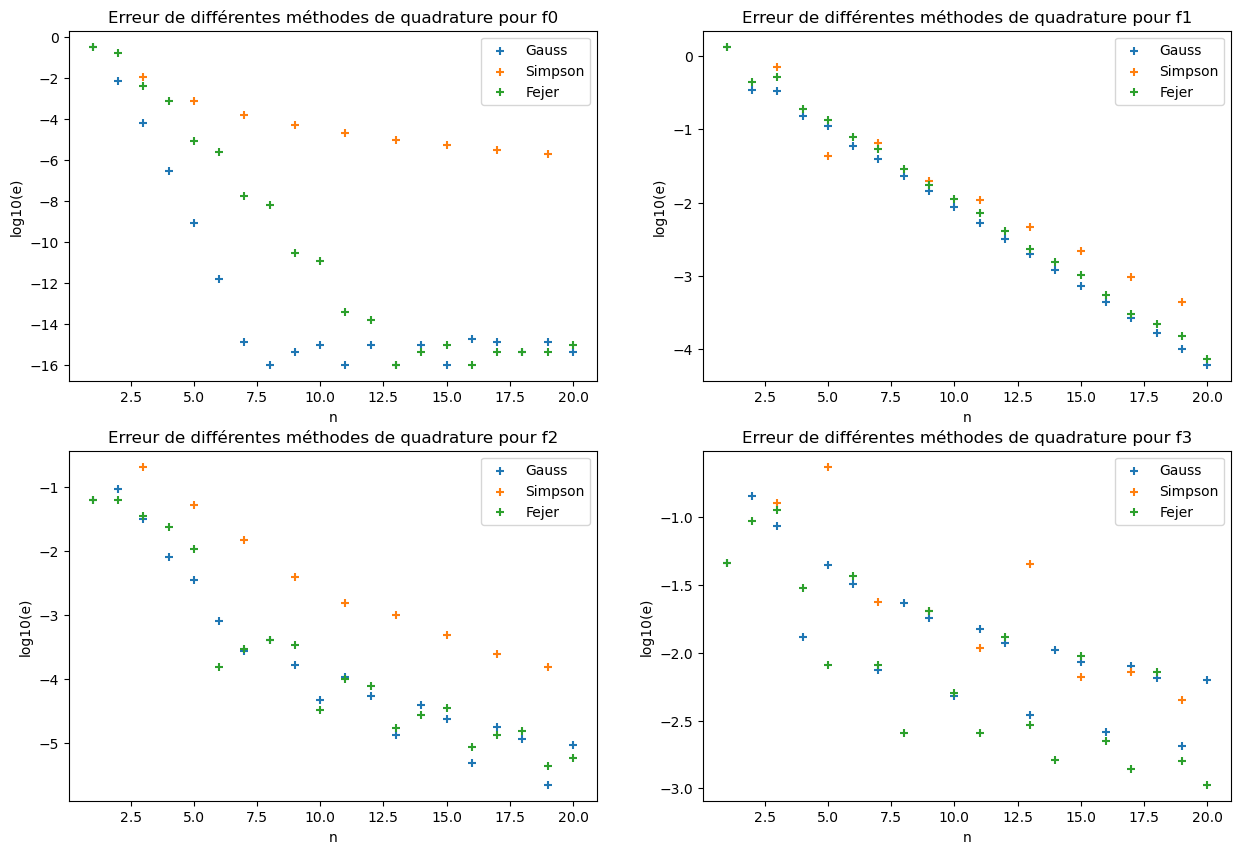

In [36]:
N = 20

figure = plt.figure(figsize=(15, 10))
for fi, f in enumerate([f0, f1, f2, f3]):
    error_gauss = np.zeros((N,))
    error_simp = np.zeros(((N-1)//2,))
    error_fejer = np.zeros((N,))
    I_quad, _ = quad(f, -1, 1)
    
    for n in range(1, N+1):
        I_gauss = gauss(f, n)
        error_gauss[n-1]  = np.abs(I_gauss - I_quad)
        I_fejer = fejer(f, n)
        error_fejer[n-1]  = np.abs(I_fejer - I_quad)
    
    for n in range( 3, N+1, 2 ):
        I_simp = simpson(f, n)
        error_simp[(n-2)//2] = np.abs(I_simp - I_quad)
    
    ax = figure.add_subplot(2, 2, fi + 1)
    ax.scatter(np.arange(1, N+1), np.log10(error_gauss, out = -16. * np.ones(error_gauss.shape), 
                                          where = (error_gauss > 1e-16)), label = 'Gauss', marker="+")
    ax.scatter(np.arange(3, N+1, 2), np.log10( error_simp ), label = 'Simpson', marker="+")
    ax.scatter(np.arange(1, N+1), np.log10(error_fejer, out = -16. * np.ones(error_fejer.shape), 
                                          where = (error_fejer > 1e-16)), label = 'Fejer', marker="+")
    ax.legend()
    ax.set_title(f"Erreur de différentes méthodes de quadrature pour {f.__name__}")
    ax.set_xlabel("n")
    ax.set_ylabel("log10(e)")

#### Commentaires des résultats obtenus

Globalement, pour nos quatres fonctions, on observe que plus N, le nombre de points augmente, plus nos trois méthodes sont précises car les erreurs diminuent. Cependant, en comparant les trois méthodes entres-elles, on remarque que, pour une fonction entière telle que f0 ou f1, la méthode de simpson est la moins précise des trois quelque surtout quand n augmente. Pour une fonction peu régulière comme f2 ou f3, les trois méthodes sont a peu près équivalentes mais restent moins précises que pour des fonctions régulières.


## Degré de précision de la formule de Fejér

Nous allons maintenant trouver numériquement le dégré de précision de la formule de Fejer.

On rappelle qu'une formule de quadrature $ J(f) $ est dite précise à l'ordre $ d $ si $ J( p ) = I( p ) $ pour tout $ p \in \mathbb{R}_d[ X ] $ et $ J( x^{ d + 1 } ) \neq I( x^{ d + 1 } ) $, où $ I( p ) $ est la valeur exacte de l'intégrale de $ p $. 

Nous allons tout d'abord vérifier numériquement que la formule $ J_G $ sur $ [-1,1] $ est précise de dégré $ 2N - 1 $.

*Les questions théoriques Question 9 et Question 11 sont facultatives (questions bonus). Vous pouvez utiliser les résultats de ces questions pour jusifier vos réponses aux Questions 10 et 12.*

**Question 9 (bonus).**
> 1. Expliquez pourquoi il suffit de montrer que $ J_G( x^k ) = I( x^k ) $, $ k = 0, 1, \ldots, 2N-1 $ et $  J_G( x^{ 2N } ) \neq I( x^{ 2N } ) $ pour montrer que $ J_G $ est précise de dégré $ 2N - 1 $.
> 2. Montrer que $ P_{ 2k } $ est une fonction paire et $ P_{ 2k + 1 } $ est une fonction impaire, $ k = 0, 1, 2, \ldots $, où $ P_N $ est le $ N $-ième polynome de Legendre. En déduire que $ \forall N \in \mathbb{N} $ si $ x $ est racine de $ P_N $, alors $ -x $ est aussi racine de $ P_N $. En déduire que pour $ k $ impair on a toujours $ J_G( x^k ) = I( x^k ) = 0 $.

**Question 10.**
> 1. Pour les valeurs $k = \lbrace 0, 2, 4, 6, 8, 10 \rbrace$ calculez l'erreur d'approximation de l'intégrale $ I(x^k) $ par la formule de Gauss à $ N $ points avec $N =  1,2,3, \ldots, 10$. Affichez l'erreur sous le format ci-dessous.
> 2. Expliquez comment les résultats obtenus montrent numériquement que la formule de quadrature de Gauss à $ N $ points est précise de degré $ 2N - 1 $.


```
------------------------------------------------------------------------------
     N        x^0      x^2      x^4      x^6      x^8      x^10      
------------------------------------------------------------------------------
     1        0.000    0.667    0.400    0.286    0.222    0.182  
     2        0.000    0.000    0.178    0.212    0.198    0.174  
    ...        ...      ...      ...      ...      ...      ...
```

**Question 11 (bonus).**
> Montrez que pour les points de Tchebychev $ x_{k, N} $ on a $ x_{ N+1-k, N } = -x_{k, N} $. En déduire que pour $ k $ impair on a toujours $ J_F( x^k ) = I( x^k ) = 0 $.

**Question 12.**
> 1. Reprendre la question 10.1 pour la formule de Fejér. 
> 2. En utilisant les résultats de la question 12.1 trouver numériquement le degré de précision de la formule de Fejér. Comparer avec le degré de précision de la formule de Newton-Cotes à $N$ points.

In [107]:
def f(x, k):
    return x**k

print("-----------------------------------------------------------------------")
print("{:>5s}     | {:>7s} {:>9s} {:>9s} {:>9s} {:>9s} {:>9s}".format("N", "x^0", "x^2", "x^4", "x^6", "x^8", "x^10"))
print("-----------------------------------------------------------------------")

for N in range(1, 11):
    approx_errors = []
    for k in [x for x in range(0, 11, 2)]:
        I_approx = gauss(lambda x: f(x, k), N)
        I_exact = 2 / (k + 1) if k % 2 == 0 else 0
        approx_error = np.abs(I_approx - I_exact)
        approx_errors.append(approx_error)
    print("{:5d}     |    ".format(N) + " ".join("{:.3f}    ".format(e) for e in approx_errors))

-----------------------------------------------------------------------
    N     |     x^0       x^2       x^4       x^6       x^8      x^10
-----------------------------------------------------------------------
    1     |    0.000     0.667     0.400     0.286     0.222     0.182    
    2     |    0.000     0.000     0.178     0.212     0.198     0.174    
    3     |    0.000     0.000     0.000     0.046     0.078     0.095    
    4     |    0.000     0.000     0.000     0.000     0.012     0.026    
    5     |    0.000     0.000     0.000     0.000     0.000     0.003    
    6     |    0.000     0.000     0.000     0.000     0.000     0.000    
    7     |    0.000     0.000     0.000     0.000     0.000     0.000    
    8     |    0.000     0.000     0.000     0.000     0.000     0.000    
    9     |    0.000     0.000     0.000     0.000     0.000     0.000    
   10     |    0.000     0.000     0.000     0.000     0.000     0.000    


Les résultats obtenus dans le tableau d'erreur montrent numériquement que la formule de quadrature de Gauss à $N$ points est précise de degré $2N-1$ car les erreurs d'approximation pour les polynômes de degré inférieur à $2N-1$ sont toutes nulles. En effet, les erreurs d'approximation pour les polynômes de degré $0, 2, \ldots, 2N-2$ sont toutes nulles, comme on peut le voir dans le tableau. En revanche, les erreurs d'approximation pour les polynômes de degré $2N, 2N+2, \ldots$ sont non nulles. Cela correspond exactement à la propriété de précision de la formule de quadrature de Gauss à $N$ points qui est de degré $2N-1$.

In [108]:
def f(x, k):
    return x**k

print("-----------------------------------------------------------------------")
print("{:>5s}     | {:>7s} {:>9s} {:>9s} {:>9s} {:>9s} {:>9s}".format("N", "x^0", "x^2", "x^4", "x^6", "x^8", "x^10"))
print("-----------------------------------------------------------------------")

for N in range(1, 11):
    approx_errors = []
    for k in [x for x in range(0, 11, 2)]:
        I_approx = fejer(lambda x: f(x, k), N)
        I_exact = 2 / (k + 1) if k % 2 == 0 else 0
        approx_error = np.abs(I_approx - I_exact)
        approx_errors.append(approx_error)
    print("{:5d}     |    ".format(N) + " ".join("{:.3f}    ".format(e) for e in approx_errors))

-----------------------------------------------------------------------
    N     |     x^0       x^2       x^4       x^6       x^8      x^10
-----------------------------------------------------------------------
    1     |    0.000     0.667     0.400     0.286     0.222     0.182    
    2     |    0.000     0.333     0.100     0.036     0.097     0.119    
    3     |    0.000     0.000     0.100     0.089     0.059     0.029    
    4     |    0.000     0.000     0.017     0.048     0.059     0.058    
    5     |    0.000     0.000     0.000     0.006     0.017     0.027    
    6     |    0.000     0.000     0.000     0.002     0.005     0.010    
    7     |    0.000     0.000     0.000     0.000     0.001     0.002    
    8     |    0.000     0.000     0.000     0.000     0.000     0.001    
    9     |    0.000     0.000     0.000     0.000     0.000     0.000    
   10     |    0.000     0.000     0.000     0.000     0.000     0.000    


Dans les formules de Newton-Côtes fermé de pas, le degré de précision est $n + 3$ si $n$ est pair $n + 2$ si $n$ est impair.
La formule de Fejér est une formule de quadrature numérique qui utilise une moyenne des polynômes de degré $n$ de la formule de quadrature de Gauss à $n$ points. Elle est précise pour des polynômes de degré $2n-1$ ou moins.

En observant le tableau d'erreur donné, on peut voir que pour la formule de Fejér, l'erreur pour $x^0$ est nulle à chaque itération, tandis que l'erreur pour $x^{2n}$ diminue à chaque itération. Cela suggère que la formule de Fejér est précise pour les polynômes de degré $2n-1$ ou moins.

D'autre part, la formule de Newton-Cotes à $n$ points est précise pour les polynômes de degré $n$ ou moins. Ainsi, pour la formule de Newton-Cotes à $n$ points, on peut voir que l'erreur diminue à chaque itération jusqu'à ce qu'elle atteigne zéro pour $x^0$ à la quatrième itération, pour $x^2$ à la cinquième itération, et ainsi de suite. Cela suggère que la formule de Newton-Cotes à $n$ points est précise pour les polynômes de degré $n$ ou moins.

En comparant les deux, on peut voir que la formule de Fejér est plus précise que la formule de Newton-Cotes à $n$ points, car elle est précise pour les polynômes de degré $2n-1$, tandis que la formule de Newton-Cotes à $n$ points n'est précise que pour les polynômes de degré $n$.

